In [ ]:
import pandas as pd
import numpy as np

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#chenyi's drive path
!cd '/content/drive/MyDrive/AI4Good/Final Project'
!ls '/content/drive/MyDrive/AI4Good/Final Project'

product_data.csv


In [58]:

product = pd.read_csv("/content/drive/MyDrive/AI4Good/Final Project/product_data.csv")
product.head(2)

,Title,Price,Package Sizing,Category
0,"Bananas, Bunch",1.75,$1.52/1kg $0.69/1lb,fruit
1,Strawberries 1LB,4.99,"454 g, $1.10/100g",fruit


In [59]:
# Try extracting with the regular expression
product[['Price Per Kilo', 'Price per Unit']] = product['Package Sizing'].str.extract(r'([\d\.]+/\w+)\s*(\$\d+\.?\d*/\w+)')
product['Quantity'] = None
# For rows where data is missing, split by comma as a fallback
fallback_df = product[product['Price Per Kilo'].isnull() | product['Price per Unit'].isnull()]
for index, row in fallback_df.iterrows():
    if ',' in row['Package Sizing']:
        quantity, price = row['Package Sizing'].split(',', 1)  # Split at the first comma
        product.at[index, 'Quantity'] = quantity.strip()
        product.at[index, 'Price per Unit'] = price.strip()

product.drop('Package Sizing', axis=1, inplace=True)

# Check the DataFrame to ensure the new columns are populated correctly
product.head(10)


,Title,Price,Category,Price Per Kilo,Price per Unit,Quantity
0,"Bananas, Bunch",1.75,fruit,1.52/1kg,$0.69/1lb,None
1,Strawberries 1LB,4.99,fruit,NaN,$1.10/100g,454 g
2,Red Cherries,5.77,fruit,6.48/1kg,$2.94/1lb,None
3,Red Seedless Watermelon,4.94,fruit,NaN,$4.94/1ea,1 ea
4,Blueberries 1 pint,4.99,fruit,NaN,$1.47/100g,340 g
5,"Avocados Bag, 5-Pack",6.99,fruit,NaN,$1.40/1ea,1 ea
6,Strawberries 2LB,8.99,fruit,NaN,$0.99/100g,907 g
7,Lemon,0.99,fruit,NaN,$0.99/1ea,1 ea
8,Extra Large Green Seedless Grapes,11.89,fruit,11.66/1kg,$5.29/1lb,None
9,Limes,0.99,fruit,NaN,$0.99/1ea,1 ea


In [68]:
def calculate_quantity(row):
    if pd.isnull(row['Quantity']):  # If Quantity is None, calculate it
        if pd.notnull(row['Price Per Kilo']) and 'kg' in row['Price Per Kilo']:  # Ensure 'kg' is part of the string
            try:
                price_per_kilo = float(row['Price Per Kilo'].split('/')[0])  # Extract numeric part
                calculated_quantity = row['Price'] / price_per_kilo  # Calculate Quantity
                return f"{calculated_quantity:.2f} kg"  # Append 'kg' after formatting
            except (ValueError, TypeError):  # Handle conversion errors
                return None  # If conversion fails, return None
        return None  # If 'Price Per Kilo' is not valid or missing, return None
    return f"{row['Quantity']} kg" if 'kg' not in row['Quantity'] and row['Quantity'].replace('.', '', 1).isdigit() else row['Quantity']
    # Append 'kg' if not already present and if the quantity is numeric

product['Quantity'] = product.apply(calculate_quantity, axis=1)
product

,Title,Price,Category,Price Per Kilo,Price per Unit,Quantity
0,"Bananas, Bunch",1.75,fruit,1.52/1kg,$0.69/1lb,1.15 kg
1,Strawberries 1LB,4.99,fruit,NaN,$1.10/100g,454 g
2,Red Cherries,5.77,fruit,6.48/1kg,$2.94/1lb,0.89 kg
3,Red Seedless Watermelon,4.94,fruit,NaN,$4.94/1ea,1 ea
4,Blueberries 1 pint,4.99,fruit,NaN,$1.47/100g,340 g
...,...,...,...,...,...,...
330,Non-Melting Cheese Paneer 20% M.F.,4.00,southAsian,NaN,$1.33/100g,300 g
331,"Red Onions, 10 lb Bag",13.99,southAsian,NaN,$0.31/100g,4.54 kg
332,Rice Basmati,17.99,southAsian,NaN,$0.42/100g,4.54 kg
333,Mango Red 3Ct,5.49,southAsian,NaN,$1.83/1ea,3 ea


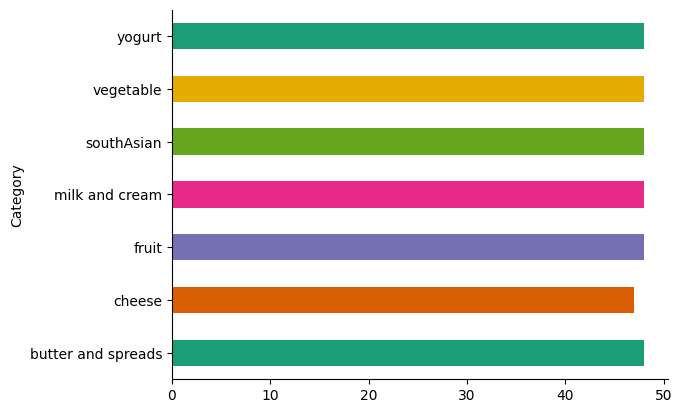

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns
product.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
product_pd = pd.read_csv("product_data.csv")


category_list = list(product_pd["Category"])
if elem in category_lis

['fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'fruit',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 'vegetable',
 '